In [136]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [137]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
import pickle
from tensorflow.keras.models import Sequential
from google.colab.patches import cv2_imshow
from tensorflow.keras.optimizers import Adam
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
import random


In [138]:
np.random.seed(0)

In [139]:
!ls german-traffic-signs/

signnames.csv  test.p  train.p	valid.p


In [140]:
with open("german-traffic-signs/train.p",'rb') as f:
  train_data=pickle.load(f)
with open("german-traffic-signs/test.p",'rb') as f:
  test_data=pickle.load(f)
with open("german-traffic-signs/valid.p",'rb') as f:
  valid_data=pickle.load(f)


In [141]:
x_train,y_train=train_data['features'],train_data['labels']
x_val,y_val=valid_data['features'],valid_data['labels']
x_test,y_test=test_data['features'],test_data['labels']

In [142]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)



(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [143]:
assert(x_train.shape[0]==y_train.shape[0]),"number of Images is not equal to number of labels in training set"
assert(x_val.shape[0]==y_val.shape[0]),"number of Images is not equal to number of labels in validation set"
assert(x_test.shape[0]==y_test .shape[0]),"number of Images is not equal to number of labels in validation set"

assert(x_train.shape[1:]==(32,32,3)),"Dimensions of images in x_train is not 32x32x3"
assert(x_val.shape[1:]==(32,32,3)),"Dimensions of images in x_val is not 32x32x3"
assert(x_test.shape[1:]==(32,32,3)),"Dimensions of images in x_test is not 32x32x3"



In [144]:
data=pd.read_csv("german-traffic-signs/signnames.csv")

In [145]:
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

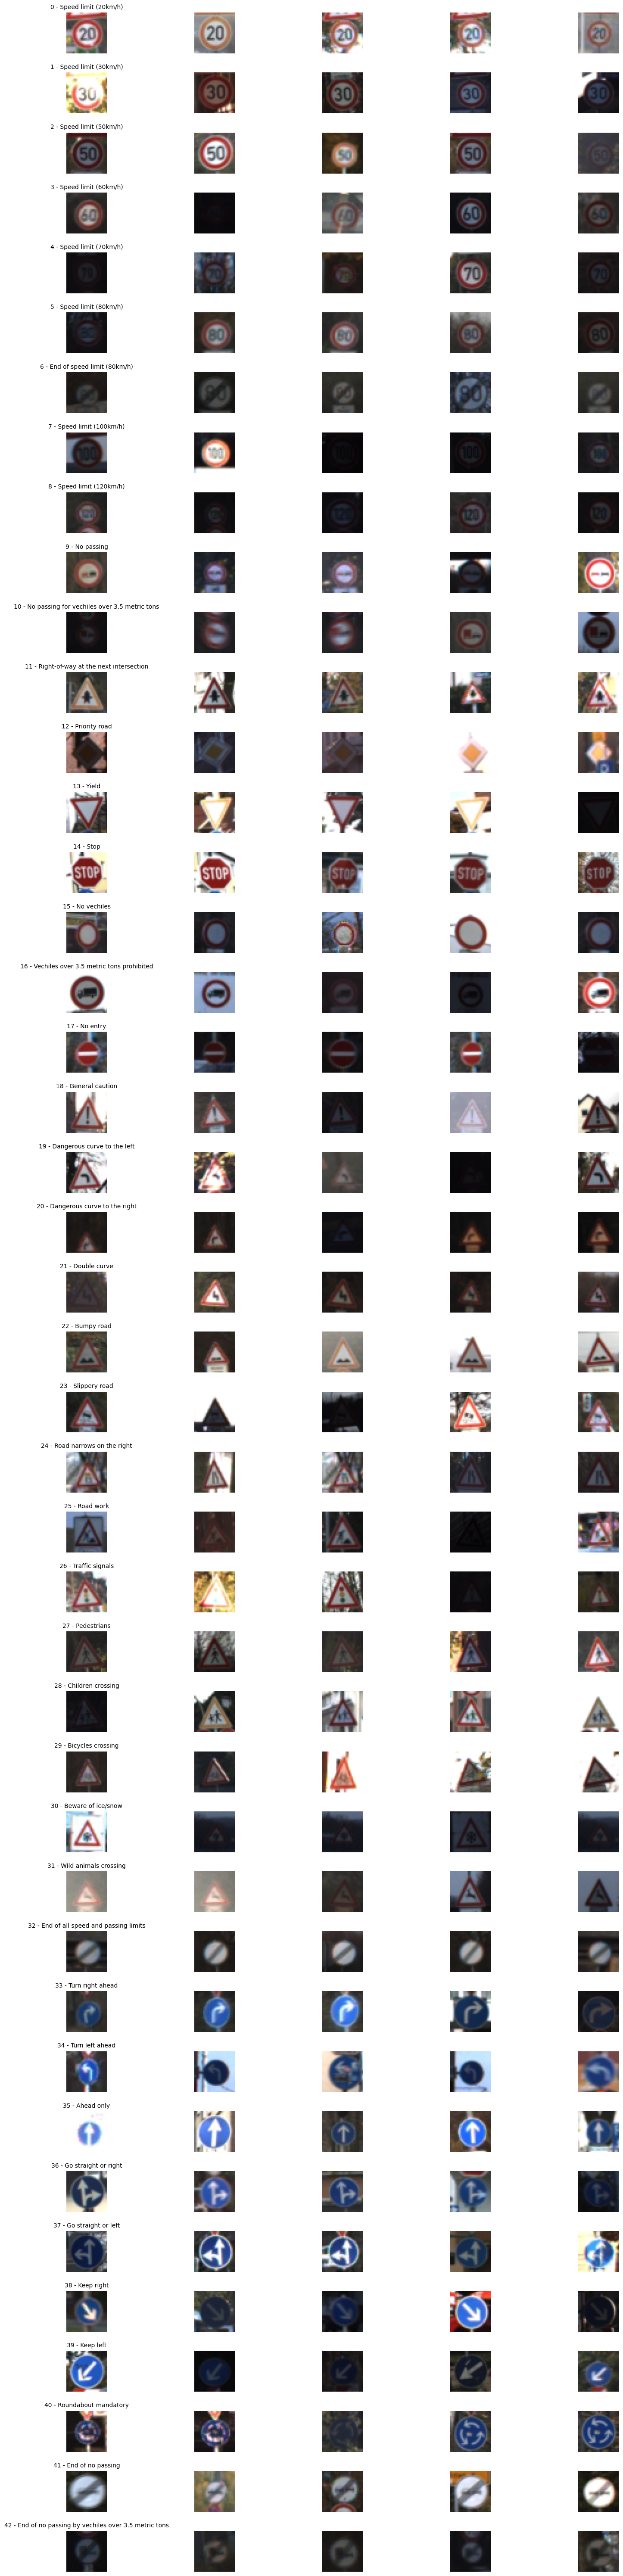

In [146]:

# Example variables (replace with actual data)
num_classes = 43
cols = 5
fig, axes = plt.subplots(nrows=num_classes, ncols=cols, figsize=(15, 60))
fig.tight_layout()

# Assuming `data` is a DataFrame with a column "SignName" for class names
# Replace `x_train`, `y_train`, and `data` with your actual dataset
num_of_samples = []

for j in range(num_classes):  # Loop over classes
    x_selected = x_train[y_train == j]  # Select images of the current class
    num_of_samples.append(len(x_selected))  # Record sample count
    for i in range(cols):  # Loop to display images
        random_index = random.randint(0, len(x_selected) - 1)
        axes[j][i].imshow(x_selected[random_index, :, :], cmap=plt.get_cmap("gray"))
        axes[j][i].axis("off")

        # Add title to the first column only
        if i == 0:
            axes[j][i].set_title(f"{j} - {data.iloc[j]['SignName']}", fontsize=10)

plt.show()

<BarContainer object of 43 artists>

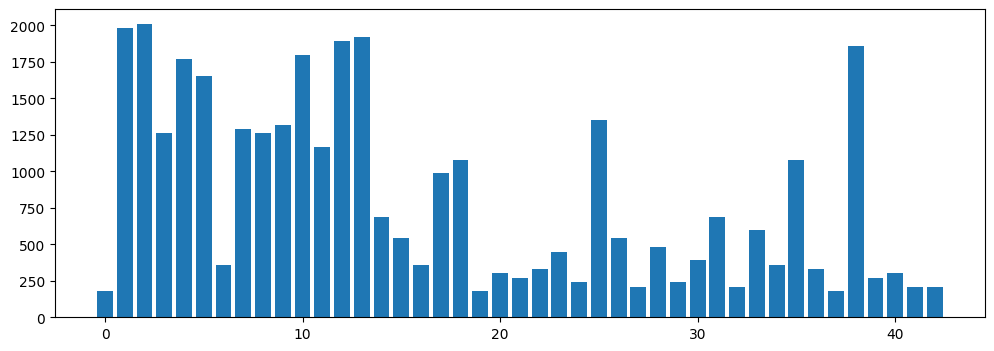

In [147]:

plt.figure(figsize=(12,4))
plt.bar(range(len(num_of_samples)),num_of_samples)

In [148]:
def grayscale(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

In [149]:
def equalize(img):
  img=cv2.equalizeHist(img)
  return img

In [150]:
img=grayscale(x_train[1000])
img1=equalize(img)

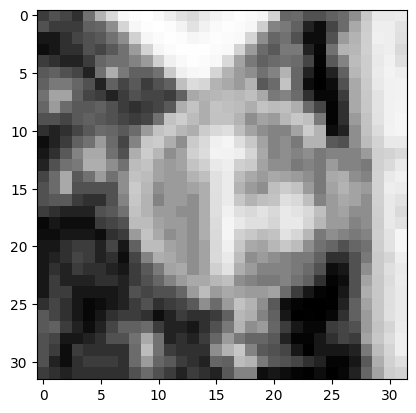

In [151]:
plt.imshow(img1,cmap='gray')

In [152]:
def preprocessing(img):
  img=grayscale(img)
  img=equalize(img)
  img=img/255
  return img


In [153]:
import numpy as np
x_train=np.array(list(map(preprocessing,x_train)))
x_val=np.array(list(map(preprocessing,x_val)))
x_test=np.array(list(map(preprocessing,x_test)))

In [154]:

x_val.shape

(4410, 32, 32)

In [155]:
x_train=x_train.reshape(34799, 32, 32,1)
x_val=x_val.reshape(4410,32, 32,1)
x_test=x_test.reshape(12630, 32, 32,1)






In [156]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(width_shift_range=0.1,
                           height_shift_range=0.1,
                           zoom_range=0.2,
                           rotation_range=10,
                           shear_range=0.1,
                           )




In [157]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)
y_val=to_categorical(y_val,43)

In [158]:
from ast import mod
def Len_net():
  model=Sequential()
  model.add(Conv2D(60,(5,5),input_shape=(32, 32,1),activation='relu'))
  model.add(Conv2D(60,(5,5),activation='relu'))

  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(Conv2D(30,(3,3),activation='relu'))

  model.add(MaxPooling2D(pool_size=(2,2)))
#  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [159]:
model=Len_net()
print(model.summary())
history=model.fit(datagen.flow(x_train,y_train,batch_size=50),steps_per_epoch=2000,epochs=10,validation_data=(x_val,y_val),shuffle=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 28, 28, 60)          │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 24, 24, 60)          │          90,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 12, 12, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 10, 10, 30)          │          16,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 8, 8, 30)            │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 500)                 │         240,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 43)                  │          21,543 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 695/2000 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - accuracy: 0.2870 - loss: 2.6083

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.4286 - loss: 2.0425 - val_accuracy: 0.9068 - val_loss: 0.3331
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8311 - loss: 0.5473 - val_accuracy: 0.9617 - val_loss: 0.1367
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8947 - loss: 0.3389 - val_accuracy: 0.9692 - val_loss: 0.0974
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9211 - loss: 0.2489 - val_accuracy: 0.9769 - val_loss: 0.0771
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9389 - loss: 0.1982 - val_accuracy: 0.9789 - val_loss: 0.0889
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9479 - loss: 0.1707 - val_accuracy: 0.9764 - val_loss: 0.0812
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9518 - loss: 0.1514 - val_accuracy: 0.9760 - val_loss: 0.0756
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9577 - loss: 0.1400 - val

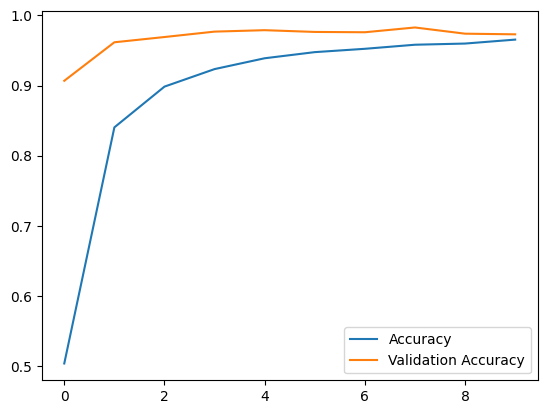

In [160]:
plt.plot(history.history['accuracy'],label="Accuracy")
plt.plot(history.history['val_accuracy'],label="Validation Accuracy")
plt.legend()

plt.show()

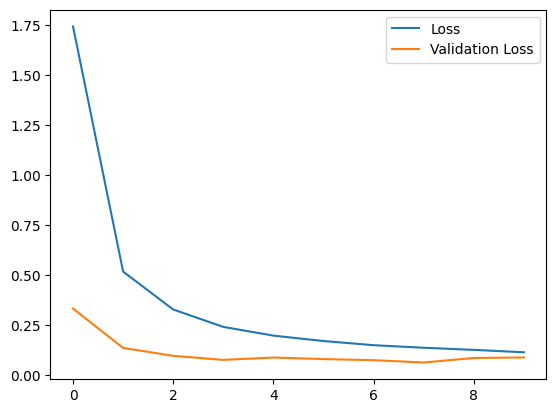

In [161]:
plt.plot(history.history['loss'],label="Loss")
plt.plot(history.history['val_loss'],label="Validation Loss")
plt.legend()

plt.show()

In [199]:
from google.colab.patches import cv2_imshow
import cv2
img1=cv2.imread("41.png")

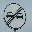

In [200]:
import cv2



img1.shape
img1=cv2.resize(img1,(32,32))
cv2_imshow(img1)


In [201]:
img1.shape

(32, 32, 3)

In [202]:
img=preprocessing(img1)

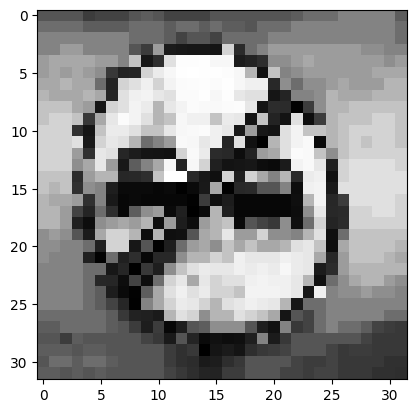

In [203]:
plt.imshow(img,cmap='gray')

In [204]:
import cv2


img_resized = np.expand_dims(img, axis=(0))  # Add batch and channel dimensions
print("Shape of resized input:", img_resized.shape)


Shape of resized input: (1, 32, 32)


In [205]:
prediction=model.predict(img_resized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [206]:

pred=np.argmax(prediction)

In [207]:
pred

41